# One-dimensional LWFA in the nonlinear regime
Let us now consider a simplified set of equations, treating the plasma like a fluid. For the moment we are not interested in the velocity but the density distribution, which can be obtained by integrating Vlasov equation over velocity space d$^3v$, i.e. $\int\frac{\mathrm d}{\mathrm dt}f(x,v,t)\mathrm d^3v=0$. This leads to the continuity equation of particle density, whose unidimensional form is written as

$$ \partial_t n_e(z,t) + \partial_z j(z,t) = 0.$$

It is common to describe the interaction in a frame moving at the phase velocity $v_{\phi}$ along the $z$-axis

$$ \xi = z - v_{\phi}t \qquad \mbox{and} \qquad \tau = t$$

where the laser pulse appears only slowly varying in proper time $\tau$ and is nearly stationary. 

This quasi-static approximation allows us to express the differentials $\partial_{\xi}$ and $\partial_{\tau}$ in terms of the phase velocity of the pulse. Also, the electrodynamic Maxwell equations can be reduced to the electrostatic Poisson equation. As shown in \cite{Dopp:2012tt} this leads to the reduced system

$$\frac{d^2 \Phi (\xi,\tau)}{d \xi^2} = -k_p^2 \left( n_0(\tau)-n_e(\xi,\tau) \right) = k_p^2\delta n(\xi,\tau)$$

$$\delta n = n_e -n_0 = \left( \frac{1}{1-v_z/v_{\phi}}  -1\right)n_0$$

where we have expressed the current $j=-en_ev_z$ in terms of electron density $n_e$ and fluid velocity $v_z$. In the limit $\beta_{\phi}\rightarrow 1$ we get then

$$ \frac{1}{k_p^2}\frac{\partial^2}{\partial \xi^2} \Phi =   \frac{n_e}{n_0} - 1 = \frac{\beta}{1-\beta} = \frac{\beta}{1-\beta} \frac{\gamma}{\gamma}  = \frac{p_z}{\gamma - p_z}. $$

What is missing now is an expression for the particle momentum evolution $p_z$ in terms of the potential. Such can be found from the relativistic Lagrangian  for an electron in an external field $\Phi(\xi)$ 

$$ \mathcal{L} = -\sqrt{1-\beta_z^2} + \Phi(\xi),$$

which via Legendre transformation leads to the Hamiltonian 

$$\mathcal{H}= P\cdot\dot{\xi} - \mathcal{L} = p_z(\beta_z-\beta_{\phi}) -\mathcal{L} = -\frac{p_z}{\beta_z}(\beta_z^2-\beta_z\beta_{\phi})+\gamma^{-1} - \Phi(\xi) = -\gamma((1-\beta_z^2) + (1-\beta_{\phi}\beta_z)) + \gamma^{-1} - \Phi(\xi) = \gamma(1-\beta_z\beta_{\phi}) - \Phi(\xi).$$

As there is no explicit time dependence, the Hamiltonian is conserved $\mathcal{H}(t)=\mbox{const.}$, where the constant is defined by the initial conditions. For a particle initially at rest ($p_z(t=0) = 0$ and $\gamma(t=0) =1$) we find 

$$
\gamma = 1 + \Phi + p_z.
$$

It can be shown \cite{Dopp:2012tt} that the transverse particle momentum $p_{\perp}$ follows the vector potential $a$ and as the energy of a relativistic particle is given by $\gamma=\sqrt{1+p_{\perp}^2+p_{\parallel}^2}$, we find 

$$ \gamma = 1 + p_z \rightarrow \gamma^2 = 1 + 2p_z + p_z^2 = 1 + p_{\perp}^2 + p_z^2 = 1 + a^2 + p_z^2 $$

and therefore we find an equation for the longitudinal momentum

$$ {p_z} = \frac{1+\Phi}{2}\left( \frac{1+a^2}{(1+\Phi)^2} - 1 \right)
$$

From earlier we know that $1+\Phi=\gamma-p_z$ and so we can combine the above equations to the non-linear one-dimensional plasma wave equation

$$ \frac{\partial^2}{\partial \xi^2} \Phi =  \frac12\left( \frac{1+a^2}{(1+\Phi)^2} - 1 \right)k_p^2.$$


In [1]:
import numpy as np # Numerical methods
import matplotlib.pyplot as plt # plotting tools
import matplotlib as mpl # plotting tools
%matplotlib inline

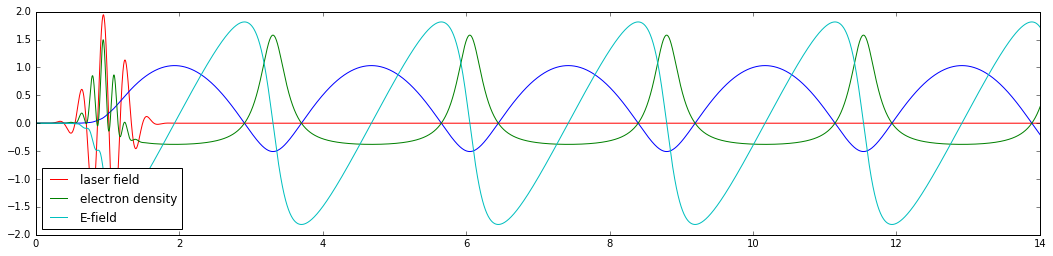

In [7]:
N = 6000 # total number of spatial grids
d_xi = 1./400 # spatial grid size in unit of plasma wavelength


a0 = 2
L = 0.2
xi0 = 5*L
kL = 20.
beta = ( 1 - (1./kL)**2 )**(0.5) 
gamma = (1 - beta**2)**(-0.5)


xi = np.arange(N)*d_xi
a = a0 * np.exp( -(xi-xi0)**2 / (4*L**2*np.log(2)) ) * np.cos(kL*xi)
phi = np.zeros(N)
eField = np.zeros(N)
ne = np.zeros(N)

for i in range(2,N):
    phi[i] = np.pi * d_xi**2 * ( (1+a[i-1]**2)/(1+phi[i-1])**2 - 1) + 2*phi[i-1] - phi[i-2]
    eField[i-1] = (phi[i-2] - phi[i])/(2.*d_xi)
    ne[i-1] = gamma**2 * beta * (1./np.sqrt( 1 - (1+a[i-1]**2)/gamma**2/(1+phi[i-1])**2 ) - beta)

fig = plt.figure(figsize=(18, 4))
plt.plot(xi,a,"-r",label='laser field')
plt.plot(xi,phi)
plt.plot(xi,ne-1,"-g",label="electron density")
plt.plot(xi,eField,"-c",label = 'E-field')
plt.xlim([0,14.0])
plt.legend(loc=3)
plt.show()